# Kinematika togega telesa
Prof. dr. Janko Slavič, Univerza v Ljubljani, Fakulteta za strojništvo

## Vrtilna količina - vektorski izračun

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sym.init_printing()

Če uporabite Google Colab, potem odkomentirajte (odstranite #) spodnje vrstice in jih sprožite:

In [2]:
#def custom_latex_printer(exp,**options):
#    from google.colab.output._publish import javascript
#    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
#    javascript(url=url)
#    return sym.printing.latex(exp,**options)
#sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

Definirajmo simbole:

In [22]:
ωx, ωy, ωz, m = sym.symbols("omega_x, omega_y, omega_z m")
x = sym.Function('x')(m)
y = sym.Function('y')(m)
z = sym.Function('z')(m)

in vektorje:

In [23]:
r = sym.Matrix([[x], [y], [z]])
ω = sym.Matrix([[ωx], [ωy], [ωz]])

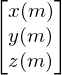

In [24]:
r

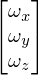

In [25]:
ω

Želimo izračunati:
$$\boldsymbol{L}=\int_m \boldsymbol{r}\times\boldsymbol{\omega}\times\boldsymbol{r}\,\,\textrm{d}m$$
Izračunajmo podintegralsko funkcijo

In [26]:
B = r.cross(ω.cross(r))

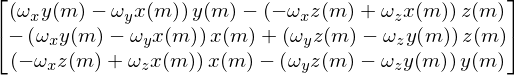

In [27]:
B

Ker je kotna hitrost $\boldsymbol{\omega}$ konstantna za vse masne delce, jo lahko izpostavimo. Poglejmo si najprej za prvo vrstico $B$:

In [28]:
B[0]

In [29]:
B[0].expand().coeff(ωx)

In [30]:
B[0].expand().coeff(ωy)

In [31]:
B[0].expand().coeff(ωz)

In sedaj posplošimo:

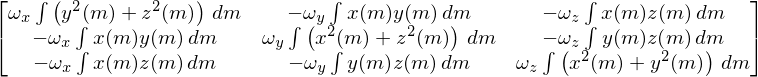

In [32]:
L = sym.Matrix([[w*sym.integrate(b.expand().coeff(w),m) for w in ω] for b in B])
L

Iz zapisa je jasno, da je smiselno zapisati masni vztrajnostni tenzor (pri togem telesu je konstanta) kot:

<img src='fig/masna matrika.png' width=350>

## Masni vztrajnostni moment trikotnika

<img src='fig/trikotnik.png' width=300>

Simboli

In [14]:
a, b, p, x, y, r, m = sym.symbols('a, b, p, x, y, rho, m')

Podatki

In [15]:
podatki = {a: 1, b:2, p: 0.01, r: 2700}

Funkcija stranice $y(x)$:

In [16]:
fx = a - a/b*y

In [18]:
fxp = sym.lambdify(y, fx.subs(podatki), 'numpy')
y_n = np.linspace(0, podatki[b], 10)
x_n = fxp(y_n)
y_n = np.append(y_n, 0.)
x_n = np.append(x_n, 0.)

Prikažimo trikotnik

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


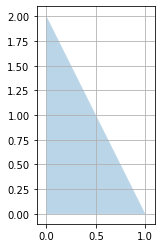

In [19]:
plt.fill(x_n[::-1], y_n[::-1], alpha=0.3, closed=True)
plt.axes().set_aspect('equal')
plt.grid(True)
plt.xlim(-.1, podatki[a]+0.1)
plt.ylim(-.1, podatki[b]+0.1)
plt.show()

Masni vztrajnostni momenti

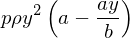

In [20]:
y**2 * fx * r * p

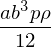

In [21]:
J_xx = sym.integrate(y**2 * fx * r * p, (y, 0, b))
J_xx

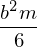

In [22]:
J_xx = J_xx.subs(p*r*a*b/2, m)
J_xx

In [23]:
J_yy = J_xx.subs(b,a)
J_zz = J_xx + J_yy

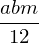

In [25]:
J_xy = sym.integrate( sym.integrate(x*y * r * p, (x, 0, fx)), (y, 0, b)).subs(p*r*a*b/2, m)
J_xy

In [26]:
J_xz = 0
J_yz = 0

In [28]:
J = sym.Matrix([[+J_xx, -J_xy, -J_xz],
            [-J_xy, +J_yy, -J_yz],
            [-J_xz, -J_yz, +J_zz]])

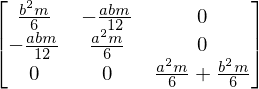

In [29]:
J

Glavni MVM

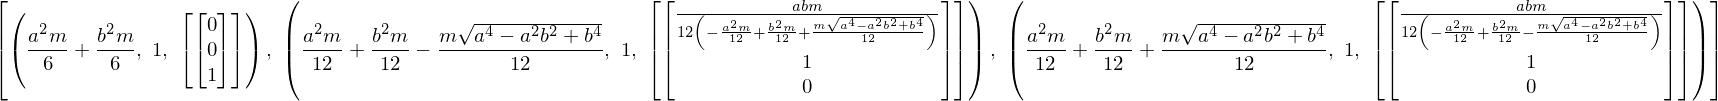

In [30]:
eig = J.eigenvects()
eig

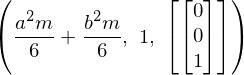

In [31]:
eig[0]

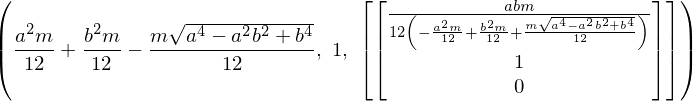

In [32]:
eig[1]

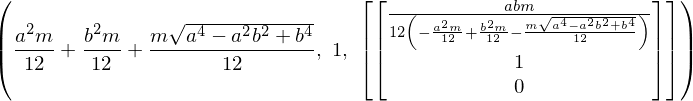

In [33]:
eig[2]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


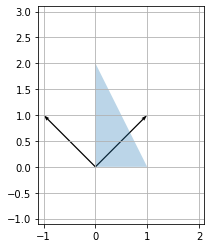

In [34]:
ax = plt.subplot(111)
plt.fill(x_n[::-1], y_n[::-1], alpha=0.3, closed=True)
plt.axes().set_aspect('equal')
plt.grid(True)
plt.xlim(-1.1, podatki[a]+1.1)
plt.ylim(-1.1, podatki[b]+1.1)
ax.quiver(0,0,1,1,angles='xy',scale_units='xy',scale=1)
ax.quiver(0,0,-1,1,angles='xy',scale_units='xy',scale=1)
plt.show()

### Zvrnitev osi

In [35]:
Lx, Ly, Lz, x, y, z = sym.symbols("lambda_x, lambda_y, lambda_z, x, y, z")

In [37]:
r = sym.Matrix([[x], [y], [z]])
L = sym.Matrix([[Lx], [Ly], [Lz]])

In [38]:
r

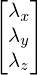

In [39]:
L

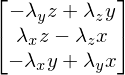

In [40]:
r.cross(L)

In [41]:
tmp1 = r.cross(L).dot(r.cross(L))
tmp1

In [42]:
tmp2 = tmp1.expand()
tmp2

In [43]:
tmp2.coeff(Lx**2)